####**ANÁLISE DE DADOS SOBRE INGRESSO DE MULHERES NO ENSINO SUPERIOR NO CURSO DE CIÊNCIAS DE DADOS**

***COLETA DOS DADOS***

**Importando as bases de dados, unificando as bases e vizualizando somente as variáveis (colunas) pertinentes para a análise**

In [ ]:
import pandas as pd

base2020 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/MICRODADOS CADASTRO CURSOS 2020.CSV', sep=';', encoding='latin1', usecols=['NU_ANO_CENSO', 'NO_REGIAO', 'NO_CURSO', 'QT_ING_FEM','QT_ING_MASC'])
base2021 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/MICRODADOS CADASTRO CURSOS 2021.CSV', sep=';', encoding='latin1', usecols=['NU_ANO_CENSO','NO_REGIAO', 'NO_CURSO', 'QT_ING_FEM','QT_ING_MASC'])
analise = pd.concat([base2020,base2021])

display(analise)

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning:

Columns (1) have mixed types.Specify dtype option on import or set low_memory=False.



,NU_ANO_CENSO,NO_REGIAO,NO_CURSO,QT_ING_FEM,QT_ING_MASC
0,2020,NaN,ADMINISTRAÇÃO PÚBLICA,0,0
1,2020,NaN,CIÊNCIAS NATURAIS E MATEMÁTICA,0,0
2,2020,NaN,MATEMÁTICA,0,0
3,2020,NaN,PEDAGOGIA,0,0
4,2020,NaN,TECNOLOGIA EDUCACIONAL,0,0
...,...,...,...,...,...
444781,2021,Sul,Gestão Pública,0,0
444782,2021,Sul,Letras - Língua Portuguesa,0,0
444783,2021,Sul,Matemática,0,1
444784,2021,Sul,Música,0,0


***TRATAMENTO DOS DADOS***

**Descartando oberservações (linhas) com valores vazios e aplicando filtro na variável "No_Curso" para vizualizar somente o valor "CIÊNCIA DE DADOS"**

In [ ]:
analise_limpa = analise = analise.dropna()
analise_limpa = analise[analise['NO_CURSO'] =='CIÊNCIA DE DADOS']
display(analise_limpa)

,NU_ANO_CENSO,NO_REGIAO,NO_CURSO,QT_ING_FEM,QT_ING_MASC
7175,2020,Centro-Oeste,CIÊNCIA DE DADOS,2,3
7257,2020,Centro-Oeste,CIÊNCIA DE DADOS,20,46
7459,2020,Centro-Oeste,CIÊNCIA DE DADOS,0,4
7902,2020,Centro-Oeste,CIÊNCIA DE DADOS,2,15
8109,2020,Centro-Oeste,CIÊNCIA DE DADOS,4,18
...,...,...,...,...,...
443231,2021,Sul,CIÊNCIA DE DADOS,0,0
443532,2021,Sul,CIÊNCIA DE DADOS,1,2
443620,2021,Sul,CIÊNCIA DE DADOS,0,1
443825,2021,Sul,CIÊNCIA DE DADOS,0,1


***ANALÍSES DOS DADOS***

**I - Constatando a predominância masculina na área ciência de dados. Observando a quantidade e média referente ao ingresso de cada gênero por região**

In [ ]:
analise_qtda = analise_limpa.groupby('NO_REGIAO')[['QT_ING_FEM','QT_ING_MASC']].agg(['sum', 'mean'])
analise_qtda.round(2)

QT_ING_FEM       QT_ING_MASC      
                    sum  mean         sum  mean
NO_REGIAO                                      
Centro-Oeste        148  0.99         490  3.29
Nordeste            158  0.49         699  2.17
Norte                55  0.45         208  1.69
Sudeste            2948  1.71        8639  5.03
Sul                 329  0.77         919  2.14

**II - Observando a quantidade do ingresso FEMININO por região e comparando seu crescimento em porcentagem em relação ao ano anterior**

In [ ]:
analise_fem = analise_limpa.groupby(['NU_ANO_CENSO','NO_REGIAO'])['QT_ING_FEM'].sum()
Fem = [analise_fem.filter(like='Centro-Oeste').diff()/50*100], [analise_fem.filter(like='Nordeste').diff()/51*100],[analise_fem.filter(like='Norte').diff()/17*100], [analise_fem.filter(like='Sudeste').diff()/1246*100], [analise_fem.filter(like='Sul').diff()/128*100]
display(analise_fem, Fem)


NU_ANO_CENSO  NO_REGIAO   
2020          Centro-Oeste      50
              Nordeste          51
              Norte             17
              Sudeste         1246
              Sul              128
2021          Centro-Oeste      98
              Nordeste         107
              Norte             38
              Sudeste         1702
              Sul              201
Name: QT_ING_FEM, dtype: int64

([NU_ANO_CENSO  NO_REGIAO   
  2020          Centro-Oeste     NaN
  2021          Centro-Oeste    96.0
  Name: QT_ING_FEM, dtype: float64], [NU_ANO_CENSO  NO_REGIAO
  2020          Nordeste            NaN
  2021          Nordeste     109.803922
  Name: QT_ING_FEM, dtype: float64], [NU_ANO_CENSO  NO_REGIAO
  2020          Norte               NaN
  2021          Norte        123.529412
  Name: QT_ING_FEM, dtype: float64], [NU_ANO_CENSO  NO_REGIAO
  2020          Sudeste            NaN
  2021          Sudeste      36.597111
  Name: QT_ING_FEM, dtype: float64], [NU_ANO_CENSO  NO_REGIAO
  2020          Sul               NaN
  2021          Sul          57.03125
  Name: QT_ING_FEM, dtype: float64])

**III - Observando a quantidade do ingresso MASCULINO por região e comparando seu crescimento em porcentagem em relação ao ano anterior**

In [ ]:
analise_masc = analise_limpa.groupby(['NU_ANO_CENSO','NO_REGIAO'])['QT_ING_MASC'].sum()
Masc = [analise_masc.filter(like='Centro-Oeste').diff()/165*100], [analise_masc.filter(like='Nordeste').diff()/250*100],[analise_masc.filter(like='Norte').diff()/79*100], [analise_masc.filter(like='Sudeste').diff()/3943*100], [analise_masc.filter(like='Sul').diff()/398*100]
display(analise_masc, Masc)


NU_ANO_CENSO  NO_REGIAO   
2020          Centro-Oeste     165
              Nordeste         250
              Norte             79
              Sudeste         3943
              Sul              398
2021          Centro-Oeste     325
              Nordeste         449
              Norte            129
              Sudeste         4696
              Sul              521
Name: QT_ING_MASC, dtype: int64

([NU_ANO_CENSO  NO_REGIAO   
  2020          Centro-Oeste          NaN
  2021          Centro-Oeste    96.969697
  Name: QT_ING_MASC, dtype: float64], [NU_ANO_CENSO  NO_REGIAO
  2020          Nordeste      NaN
  2021          Nordeste     79.6
  Name: QT_ING_MASC, dtype: float64], [NU_ANO_CENSO  NO_REGIAO
  2020          Norte              NaN
  2021          Norte        63.291139
  Name: QT_ING_MASC, dtype: float64], [NU_ANO_CENSO  NO_REGIAO
  2020          Sudeste            NaN
  2021          Sudeste      19.097134
  Name: QT_ING_MASC, dtype: float64], [NU_ANO_CENSO  NO_REGIAO
  2020          Sul                NaN
  2021          Sul          30.904523
  Name: QT_ING_MASC, dtype: float64])

***VIZUALIZAÇÃO DOS DADOS***

**Apresentando os resultados da análise**

**I - Exibição do ingresso FEMININO por região**

              CRESCIMENTO FEMININO (%)
REGIÃO                                
Centro-Oeste                     96.00
Nordeste                        109.80
Norte                           123.52
Sudeste                          36.59
Sul                              57.03


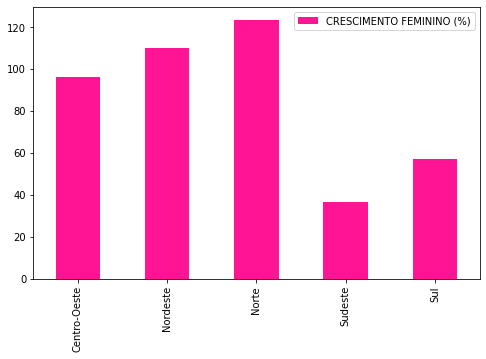

In [ ]:
import matplotlib.pyplot as plt

analise_conciliadafem = {
                         
    'REGIÃO': ['Centro-Oeste', 'Nordeste', 'Norte','Sudeste', 'Sul'],

    'CRESCIMENTO FEMININO (%)': [96.00, 109.80, 123.52,36.59,57.03],}

resultado_fem = pd.DataFrame(analise_conciliadafem)

graficofem = resultado_fem[['CRESCIMENTO FEMININO (%)']].plot(figsize=(8,5), color = 'deeppink', kind='bar')
graficofem.set_xticklabels(resultado_fem['REGIÃO'])

resultado_fem.set_index(['REGIÃO'], inplace=True)

print(resultado_fem) 

**II - Exibição do ingresso MASCULINO por região**

              CRESCIMENTO MASCULINO (%)
REGIÃO                                 
Centro-Oeste                      96.96
Nordeste                          79.60
Norte                             63.29
Sudeste                           19.09
Sul                               30.90


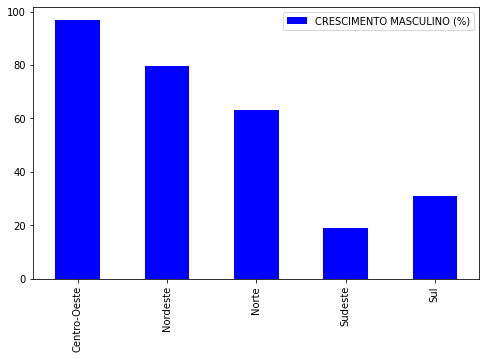

In [ ]:
analise_conciliadamasc = {
                         
    'REGIÃO': ['Centro-Oeste', 'Nordeste', 'Norte','Sudeste', 'Sul'],

    'CRESCIMENTO MASCULINO (%)': [96.96, 79.60, 63.29,19.09,30.90],}

resultado_masc = pd.DataFrame(analise_conciliadamasc)

graficomasc = resultado_masc[['CRESCIMENTO MASCULINO (%)']].plot(figsize=(8,5), color = 'blue', kind='bar')
graficomasc.set_xticklabels(resultado_masc['REGIÃO'])

resultado_masc.set_index(['REGIÃO'], inplace=True)

print(resultado_masc)

**III - Exibição conciliada ingresso FEMININO e MANSCULINO por região**

              CRESCIMENTO FEMININO (%)  CRESCIMENTO MASCULINO (%)
REGIÃO                                                           
Centro-Oeste                     96.00                      96.96
Nordeste                        109.80                      79.60
Norte                           123.52                      63.29
Sudeste                          36.59                      19.09
Sul                              57.03                      30.90


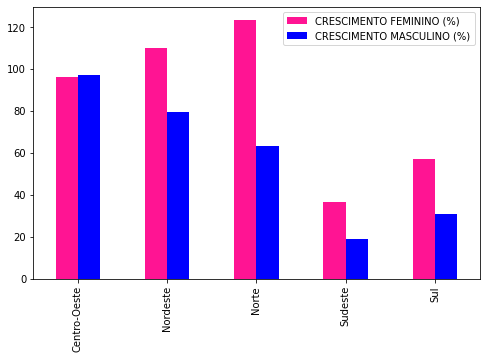

In [ ]:
conciliado = {
                         
    'REGIÃO': ['Centro-Oeste', 'Nordeste', 'Norte','Sudeste', 'Sul'],

    'CRESCIMENTO FEMININO (%)': [96.00, 109.80, 123.52,36.59,57.03],

    'CRESCIMENTO MASCULINO (%)': [96.96, 79.60, 63.29,19.09,30.90],}

analise_final = pd.DataFrame(conciliado)

graficoconc = analise_final[['CRESCIMENTO FEMININO (%)','CRESCIMENTO MASCULINO (%)']].plot(figsize=(8,5), color = ['deeppink', 'blue'], kind='bar')
graficoconc.set_xticklabels(analise_final['REGIÃO'])

analise_final.set_index(['REGIÃO'], inplace=True)

print(analise_final)


**IV - Exibição da MÉDIA entre o crescimento das duas variáveis analisadas no período 2020-2021**

           MEDIA(%)
FEMININO      84.59
MASCULINO     57.97


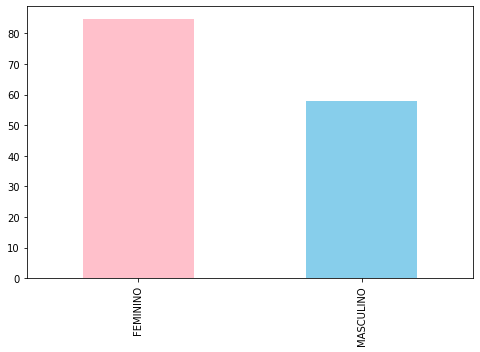

In [332]:
media_fem = resultado_fem['CRESCIMENTO FEMININO (%)'].mean().round(2)
media_masc = resultado_masc['CRESCIMENTO MASCULINO (%)'].mean().round(2)

analise_mdfinal = pd.DataFrame([media_fem, media_masc])
analise_mdfinal.rename(columns={0: 'MEDIA(%)'}, inplace = True)
analise_mdfinal.rename(index={0:'FEMININO', 1:'MASCULINO'} , inplace = True)
print(analise_mdfinal)

graficomed = analise_mdfinal['MEDIA(%)'].plot(figsize=(8,5), color = ['pink', 'skyblue'], kind='bar')


**V - Comentários finais dos Resultado da Análise**

In [333]:
print('A média do crescimento do ingresso FEMININO em ensino superior no curso de Ciências de Dados no ano de 2021 foi de:',media_fem, '%')
print('A média do crescimento do ingresso MASCULINO em ensino superior no curso de Ciências de Dados no ano de 2021 foi de:',media_masc, '%')
print('Em 2021 o ingresso foi de: {:.2f}'.format(media_fem-media_masc),'% maior para as mulheres na aréa de dados')

A média do crescimento do ingresso FEMININO em ensino superior no curso de Ciências de Dados no ano de 2021 foi de: 84.59 %
A média do crescimento do ingresso MASCULINO em ensino superior no curso de Ciências de Dados no ano de 2021 foi de: 57.97 %
Em 2021 o ingresso foi de: 26.62 % maior para as mulheres na aréa de dados
